In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x
        
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
        print(b.N)

    return cumulative_average

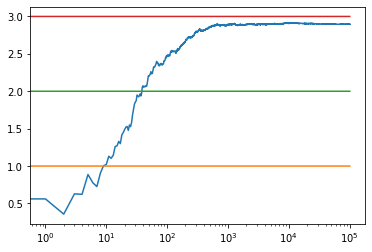

0.9761063408937273
3364
2.0013060569566234
3412
2.997279045813047
93224


In [59]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

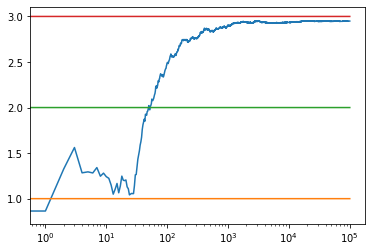

1.0097619143911871
1686
1.9164345827761702
1651
3.0008725770034275
96663


In [60]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

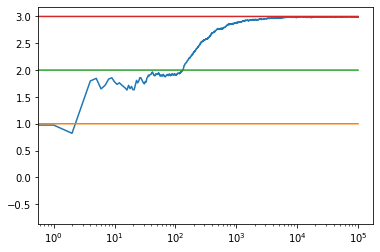

0.9361017676939225
349
2.0647939242590043
474
2.9995375100465886
99177


In [61]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


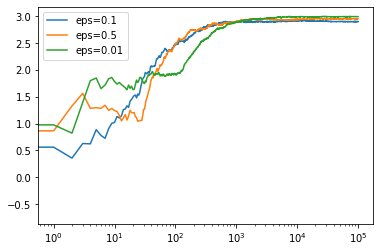

In [62]:
# log scale plot
plt.plot(c_1, label='eps=0.1')
plt.plot(c_05, label='eps=0.5')
plt.plot(c_01, label='eps=0.01')
plt.legend()
plt.xscale('log')

C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


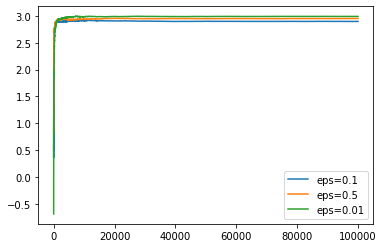

In [63]:
# linear plot
plt.plot(c_1, label='eps=0.1')
plt.plot(c_05, label='eps=0.5')
plt.plot(c_01, label='eps=0.01')
plt.legend()

The mean value for standard normal distribution is 0. so in any case it will try to go towards 0 as we can see in the cumulative value plots. <br>
Here as we add 1.0, 2.0 and 3.0 in the random normally distributed values we make 3.0 as the max value or the optimum bandit and hence the final cumulative graph turns towards 3.0 + 0 = 3.0 <br>
Also we can see that epsilon Greedy makes the optimum bandit i.e. 3.0 selection >90% times